In [4]:
import pandas as pd
import re
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [5]:
import torch

# GPU 사용 가능 -> True, GPU 사용 불가 -> False
print(torch.cuda.is_available())

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

True


In [6]:
ndata = pd.read_csv('data\\netflix_reviews.csv')

In [7]:
# ndata = data.dropna()

In [8]:
ndata.head(5)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,411500b0-ac01-4071-badf-8aa8a45d0f29,Priya S,"With basic plan, Netflix can consider to allow...",2,0,8.137.0 build 4 50942,2024-10-22 14:16:52,8.137.0 build 4 50942
1,5ef1c68e-9d84-4afb-8c58-829a554dc89b,angel dolla,Good app for series.,5,0,8.137.0 build 4 50942,2024-10-22 14:04:30,8.137.0 build 4 50942
2,1fe7e31a-43d9-406e-94cd-549d019ec70f,CHRISTIAN SUMATRA,Laging wala mga movies na magaganda potangina ...,1,0,8.136.0 build 3 50908,2024-10-22 14:02:38,8.136.0 build 3 50908
3,c5cb0034-5395-417e-ad31-84c6ac79340b,Raghu Pathy,This app uses more data and it's asking withou...,1,0,8.136.0 build 3 50908,2024-10-22 13:57:12,8.136.0 build 3 50908
4,43257f77-7b9e-40b8-ac56-c87ff3130619,Rebecka Todd,Since the latest update i am not able to load ...,1,0,8.136.0 build 3 50908,2024-10-22 13:48:29,8.136.0 build 3 50908


In [9]:
ndata.tail(5)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
117214,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
117215,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117216,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
117217,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346
117218,dc1352e9-10a8-41ca-ab23-05d045b08e90,suraj soni,"this app is awesome for english movies ,series...",4,0,NaN,2020-05-24 11:04:08,NaN


In [10]:
ndata.shape

(117219, 8)

In [11]:
text = ndata['content']

In [12]:
pd.DataFrame(text)

,content
0,"With basic plan, Netflix can consider to allow..."
1,Good app for series.
2,Laging wala mga movies na magaganda potangina ...
3,This app uses more data and it's asking withou...
4,Since the latest update i am not able to load ...
...,...
117214,i really like it! there are so many movies and...
117215,I love Netflix. I always enjoy my time using it.
117216,Sound quality is very slow of movies
117217,Rate is very expensive.. bcos we see netflix s...


In [13]:
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

In [14]:
ndata['content'] = ndata['content'].apply(preprocess_text)
ndata['content'] = ndata['content'].dropna()


In [15]:
ndata.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,411500b0-ac01-4071-badf-8aa8a45d0f29,Priya S,with basic plan netflix can consider to allow ...,2,0,8.137.0 build 4 50942,2024-10-22 14:16:52,8.137.0 build 4 50942
1,5ef1c68e-9d84-4afb-8c58-829a554dc89b,angel dolla,good app for series,5,0,8.137.0 build 4 50942,2024-10-22 14:04:30,8.137.0 build 4 50942
2,1fe7e31a-43d9-406e-94cd-549d019ec70f,CHRISTIAN SUMATRA,laging wala mga movies na magaganda potangina ...,1,0,8.136.0 build 3 50908,2024-10-22 14:02:38,8.136.0 build 3 50908
3,c5cb0034-5395-417e-ad31-84c6ac79340b,Raghu Pathy,this app uses more data and its asking without...,1,0,8.136.0 build 3 50908,2024-10-22 13:57:12,8.136.0 build 3 50908
4,43257f77-7b9e-40b8-ac56-c87ff3130619,Rebecka Todd,since the latest update i am not able to load ...,1,0,8.136.0 build 3 50908,2024-10-22 13:48:29,8.136.0 build 3 50908


In [16]:
#########################################################################################################################

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
review_num = pd.value_counts(ndata['score']).sort_index()
score = review_num.index.sort_values()

C:\Users\vulca\AppData\Local\Temp\ipykernel_24840\951864728.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  review_num = pd.value_counts(ndata['score']).sort_index()


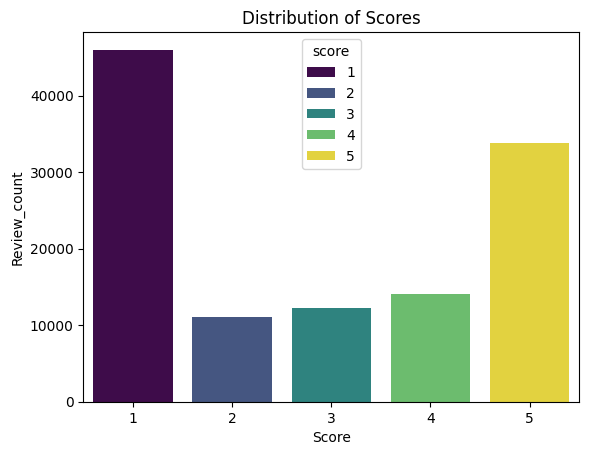

In [19]:
# x 값에는 그 score의 값/ y는 score을 포함하는 양을 넣는다.
sns.barplot(x=score, y=review_num, hue = score, palette='viridis')

plt.xlabel('Score')
plt.ylabel('Review_count')
plt.title('Distribution of Scores')
plt.show()

In [20]:
#########################################################################################################################

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import torch.nn.utils.rnn as rnn_utils

In [22]:
# 1단계 데이터의 준비
reviews = ndata['content'].tolist()
ratings = ndata['score'].tolist()

train_reviews, test_reviews, train_ratings, test_ratings = train_test_split(reviews,ratings,test_size=0.2,random_state=42)

In [23]:
# 2단계 데이터의 전처리
tokenizer = get_tokenizer("basic_english")


# 텍스트 파이프라인 정의
def text_pipeline(text):
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    tokens = tokenizer(text)  # 토큰화
    indices = tokens_to_indices(tokens)  # 인덱스로 변환
    if len(indices) == 0:  # 빈 결과 방지
        indices = [vocab["<unk>"]]
    return indices



def build_vocab(texts):
    return build_vocab_from_iterator(map(tokenizer, texts), specials=["<unk>"])


# 어휘 사전 초기화
vocab = build_vocab(train_reviews)
vocab.set_default_index(vocab["<unk>"])

# 토큰을 인덱스로 변환하는 함수
def tokens_to_indices(tokens):
    return [vocab[token] for token in tokens]


def label_pipeline(label):
    return int(label)

In [24]:
# collate_batch 함수 정의
def collate_batch(batch):
    label_list, text_list, lengths = [], [], []
    for (_text, _label) in batch:
        label_list.append(_label)
        processed_text = torch.tensor(_text)
        text_list.append(processed_text)
        lengths.append(len(_text))
    padded_text = rnn_utils.pad_sequence(text_list, batch_first=True, padding_value=0).to(device)
    return padded_text, torch.tensor(label_list).to(device), torch.tensor(lengths).cpu()  # lengths는 CPU에 할당

In [25]:
# 데이터셋 클래스 정의
class ReviewDataset(Dataset):
    def __init__(self, reviews, ratings, text_pipeline, label_pipeline):
        self.reviews = reviews
        self.ratings = ratings
        self.text_pipeline = text_pipeline
        self.label_pipeline = label_pipeline

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = self.text_pipeline(self.reviews[idx])
        rating = self.label_pipeline(self.ratings[idx])
        return torch.tensor(review),torch.tensor(rating)
    

# Label Encoder 정의 및 적용
unique_ratings = list(set(ratings))

label_encoder = LabelEncoder()
label_encoder.fit(unique_ratings)
encoded_train_ratings = label_encoder.transform(train_ratings)
encoded_test_ratings = label_encoder.transform(test_ratings)



# 데이터셋 및 데이터로더 초기화
train_dataset = ReviewDataset(train_reviews, encoded_train_ratings.tolist(), text_pipeline, label_pipeline)
test_dataset = ReviewDataset(test_reviews, encoded_test_ratings.tolist(), text_pipeline, label_pipeline)


# DataLoader 초기화
train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=256, shuffle=False, collate_fn=collate_batch)


In [26]:
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.attention = nn.Linear(hidden_dim * 2, 1, bias=False)

    def forward(self, lstm_output, final_hidden):
        attn_weights = torch.tanh(self.attention(lstm_output))
        attn_weights = torch.sum(attn_weights, dim=2).unsqueeze(2)
        attn_weights = torch.softmax(attn_weights, dim=1)
        context = attn_weights * lstm_output
        context = torch.sum(context, dim=1)
        return context


class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
        self.attention = Attention(hidden_dim)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)


    def forward(self, text, lengths):  # lengths 인수를 추가
        embedded = self.embedding(text)
        packed_input = nn.utils.rnn.pack_padded_sequence(embedded, lengths, batch_first=True, enforce_sorted=False)
        packed_output, (hidden, cell) = self.lstm(packed_input)
        lstm_output, _ = nn.utils.rnn.pad_packed_sequence(packed_output, batch_first=True)
        attn_output = self.attention(lstm_output, torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        return self.fc(attn_output)

In [27]:
# 하이퍼파라미터 정의
VOCAB_SIZE = len(vocab)  # 어휘 사전의 크기
EMBED_DIM = 64  # 임베딩 차원 크기
HIDDEN_DIM = 128  # LSTM 히든 레이어 크기
OUTPUT_DIM = len(set(ratings))  # 예측할 점수의 개수


# 모델 초기화
model = LSTMModel(VOCAB_SIZE, EMBED_DIM, HIDDEN_DIM, OUTPUT_DIM)
model.to(device)


# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [28]:
# 모델 학습
num_epochs = 10  # 에포크 수 설정
for epoch in range(num_epochs):
    model.train()  # 모델을 학습 모드로 전환
    epoch_loss = 0
    for reviews, ratings, lengths in train_dataloader:
        reviews, ratings = reviews.to(device), ratings.to(device)  # lengths는 CPU에 남겨둠
        optimizer.zero_grad()
        outputs = model(reviews, lengths)  # lengths는 CPU 텐서로 전달
        loss = criterion(outputs, ratings)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(train_dataloader):.4f}')
print('Finished Training')


C:\Users\vulca\AppData\Local\Temp\ipykernel_24840\4017357026.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  processed_text = torch.tensor(_text)


Epoch [1/10], Loss: 1.0209
Epoch [2/10], Loss: 0.8795
Epoch [3/10], Loss: 0.8144
Epoch [4/10], Loss: 0.7651
Epoch [5/10], Loss: 0.7250
Epoch [6/10], Loss: 0.6956
Epoch [7/10], Loss: 0.6744
Epoch [8/10], Loss: 0.6711
Epoch [9/10], Loss: 0.6723
Epoch [10/10], Loss: 0.6745
Finished Training


In [29]:
# 예측 함수 
def predict_review(model, review):
    model.eval()  # 모델을 평가 모드로 전환
    with torch.no_grad():  # 그라디언트 계산 중지
        tensor_review = torch.tensor(text_pipeline(review)).unsqueeze(0).to(device) # 리뷰를 텐서로 변환하고 배치 차원 추가
        print(tensor_review)
        length = torch.tensor([len(text_pipeline(review))]).cpu()  # 길이 텐서 생성
        print(length)
        output = model(tensor_review, length)  # 모델 예측 값
        prediction = output.argmax(1).item()  # 가장 높은 확률의 클래스를 예측
        return label_encoder.inverse_transform([prediction])[0]  # 예측된 클래스를 원래 점수로 변환

In [42]:
new_review = "I hate this app"
predicted_score = predict_review(model, new_review)
print(f'Predicted Score: {predicted_score}')

tensor([[  2, 303,  15,   9]], device='cuda:0')
tensor([4])
Predicted Score: 1


In [31]:
from collections import Counter

print(Counter(encoded_train_ratings))


Counter({0: 36838, 4: 27054, 3: 11310, 2: 9765, 1: 8808})


In [32]:
encoded_train_ratings.sum()

170484

In [33]:
ndata['content'].count()

117219

In [34]:
# 전처리 확인 예시
example_texts = ["I hate this app", "This app is great but has some bugs", "I love this"]
for text in example_texts:
    processed = text_pipeline(text)
    print(f'Text: {text}\nProcessed: {processed}\n')

Text: I hate this app
Processed: [2, 303, 15, 9]

Text: This app is great but has some bugs
Processed: [15, 9, 6, 44, 12, 49, 72, 600]

Text: I love this
Processed: [2, 38, 15]



In [35]:
#########################################################################################################################

In [36]:
import nltk
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from textblob import TextBlob

In [37]:
# 감성 분석을 위한 함수
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [38]:
# (DIY) apply를 사용하여 감성 분석을 해보세요. 필수 텍스트가 전처리되어있어야 합니다.
ndata['sentiment'] = ndata['content'].apply(get_sentiment)

# df에 sentiment 값을 적용을 먼저 하시고, 아래와 같이 긍정과 부정을 분류하세요.
ndata['sentiment_label'] = ndata['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))
ndata[['content', 'score', 'sentiment_label']]

,content,score,sentiment_label
0,with basic plan netflix can consider to allow ...,2,neutral
1,good app for series,5,positive
2,laging wala mga movies na magaganda potangina ...,1,neutral
3,this app uses more data and its asking without...,1,positive
4,since the latest update i am not able to load ...,1,neutral
...,...,...,...
117214,i really like it there are so many movies and ...,5,positive
117215,i love netflix i always enjoy my time using it,5,positive
117216,sound quality is very slow of movies,1,neutral
117217,rate is very expensive bcos we see netflix sun...,1,negative


In [39]:
#########################################################################################################################

In [40]:
from wordcloud import WordCloud, STOPWORDS

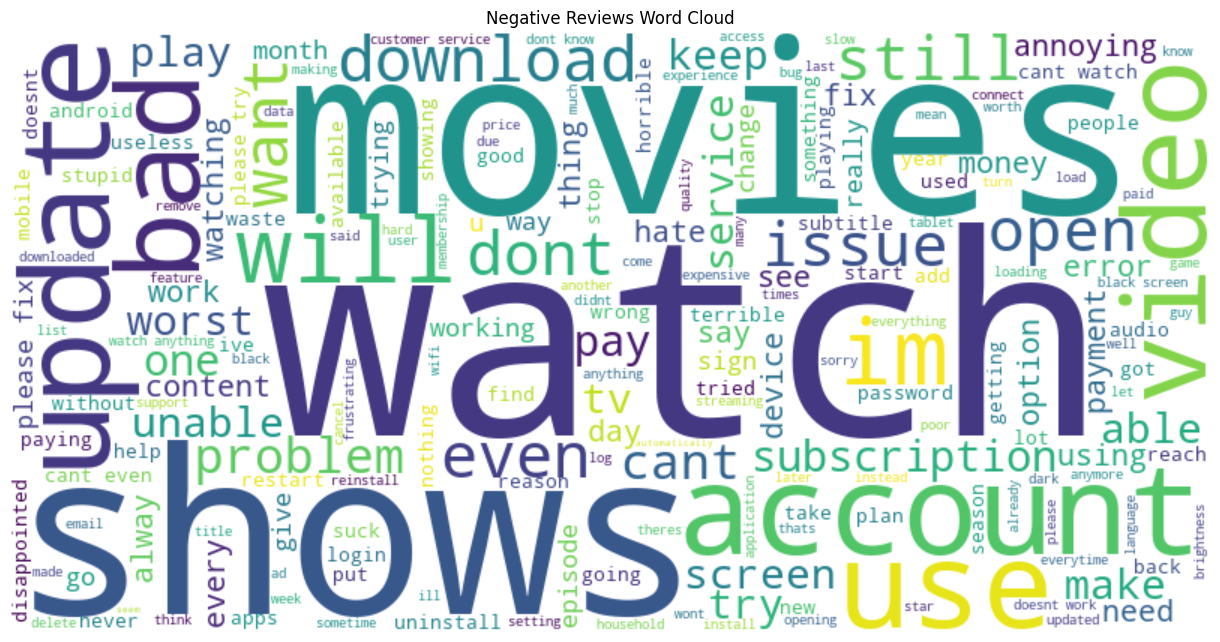

In [41]:
# (선택) 불용어를 먼저 제거해주세요.
stopwords = set(STOPWORDS)
stopwords.update(['netflix','movie','now', 'show', 'time', 'app', 'series', 'phone'])  # 리뷰에서 필요없는 단어는 여기 안에 추가하셔도 좋습니다.

negative_reviews = "".join(ndata[ndata['sentiment_label']=="negative"]['content'])


# 부정적인 리뷰만 먼저 모아본 다음, 아래처럼 wordcloud를 그려보세요
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(negative_reviews)

plt.figure(figsize=(12,6), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Negative Reviews Word Cloud')
plt.show()